In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SVMSMOTE,ADASYN
import collections

import lightgbm as lgb

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
data = pd.read_csv("/home/uchida_ma/work/dataset/loan/UCI_Credit_Card.csv")

In [3]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


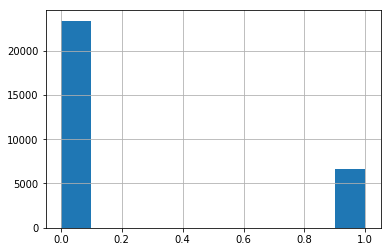

In [6]:
data['default.payment.next.month'].hist(label=True)

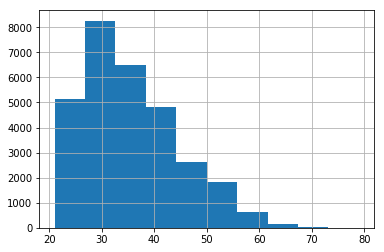

In [7]:
data['AGE'].hist(label=True)

In [8]:
target=data['default.payment.next.month']
dataset=data.drop('default.payment.next.month',axis=1)

In [9]:
#std_scl=StandardScaler()
#std_scl.fit(dataset)
#dataset_std=pd.DataFrame(std_scl.transform(dataset),columns=dataset.columns)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(dataset_std, target, test_size=0.2, random_state=0)

In [11]:
collections.Counter(y_train)


Counter({0: 18661, 1: 5339})

In [12]:
collections.Counter(y_test)

Counter({0: 4703, 1: 1297})

In [13]:
#oversampleing
sm=SVMSMOTE(sampling_strategy='auto',random_state=2)
#sm=ADASYN(sampling_strategy='auto',random_state=2)

In [14]:
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

In [15]:
#df=pd.DataFrame(data=y_train_sm,columns=['default.payment.next.month'])

In [16]:

#collections.Counter(y_train_sm)

In [17]:
#svc=SVC()
##svc=SVC(random_state=0,kernel='rbf',C=10,gamma=1)
#svc=SVC(random_state=0,kernel='linear')

In [18]:
#svc.fit(X_train,y_train)
##svc.fit(X_train_sm,y_train_sm)

In [19]:
#y_pred=svc.predict(X_test)

In [20]:
#classifier=DecisionTreeClassifier()

In [21]:
#classifier.fit(X_train,y_train)
#classifier.fit(X_train_sm,y_train_sm)

In [22]:
#y_pred=classifier.predict(X_test)

In [23]:
lgb.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [24]:
#train_data=lgb.Dataset(X_train,label=y_train)
train_data=lgb.Dataset(X_train_sm,label=y_train_sm)

In [25]:
eval_data=lgb.Dataset(X_test,label=y_test,reference=train_data)

In [26]:
def lgb_f1_score(y_hat,data):
    y_true = data.get_label()
    y_hat=np.round(y_hat)
    return 'f1',f1_score(y_true,y_hat),True

evals_result={}

params={
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective':'binary',
    #'metric':'auc',
    'verbose':2,
    
}

In [27]:
gbm=lgb.train(
    params,
    train_data,
    valid_sets=eval_data,
    num_boost_round=100,
    feval=lgb_f1_score,
    verbose_eval=5,
    early_stopping_rounds=10
)

Training until validation scores don't improve for 10 rounds.
[5]	valid_0's binary_logloss: 0.557554	valid_0's f1: 0.508655
[10]	valid_0's binary_logloss: 0.495595	valid_0's f1: 0.509485
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.597375	valid_0's f1: 0.516047


In [28]:
#pred_tmp=gbm.predict(X_test)
pred_tmp=gbm.predict(X_test,num_iteration=gbm.best_iteration)

In [29]:
# y_pred=[]
# for x in pred_tmp:
#     y_pred.append(np.argmax(x))

y_pred=np.round(pred_tmp).astype(int)

In [30]:
accuracy_score(y_test,y_pred)

0.809

In [31]:
f1_score(y_test,y_pred)

0.5160472972972973

In [32]:
labels=sorted(list(set(y_test)))
cm=confusion_matrix(y_test,y_pred,labels=labels)
print(cm)

[[4243  460]
 [ 686  611]]
